In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("./Training Data/Linear_X_Train.csv")
y_train = pd.read_csv("./Training Data/Linear_Y_Train.csv")

In [5]:
X_train = X_train.values
y_train = y_train.values

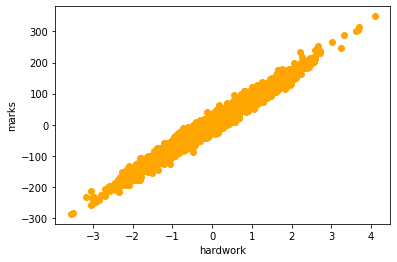

In [7]:
plt.scatter(X_train, y_train, color='orange')
plt.xlabel("hardwork")
plt.ylabel("marks")
plt.show()

In [23]:
X_train.shape

(3750, 1)

In [24]:
y_train.shape

(3750, 1)

### Preprocess - Col. Standaridzation
 - makes G.D works faster (converge)

In [11]:
mu = X_train.mean()
sig = X_train.std()

In [13]:
X_train = (X_train - mu)/ sig

# Linear Regression

In [46]:
def hypothesis(x, theta):
    """
    theta : np array (2,1)
    x : scaler 
    
    return : prediction given input(x)
    """
    return theta[0] + theta[1]*x

def error(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : total error for any hypothesis
    """
    
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        total_err += (yhat_i - yi)**2
    
    return total_err/m

def gradient(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : np array gradient (2,1)
    """
    m  = X.shape[0]
    
    grad = np.zeros(2)
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        grad[0] += (yhat_i - yi)
        grad[1] += (yhat_i - yi)*X[i]
        
    return grad/m

def gradient_descent(X, Y, lr =0.1, max_itr = 100):
    """
    parameters: 
        X - (3750, 1) 
        Y - (3750, 1) 
        lr - learning rate
        max_itr  - maximum iteration
    
    ----------------------------------
    
    return : 
        theta vector (2,1)
        error_list  
    """
    
    
    theta = np.zeros(2,)
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, Y, theta)
        error_list.append(err[0])
        
        grad = gradient(X, Y, theta)
        
        # Updation Rule
        theta[0]  = theta[0] - lr*grad[0]
        theta[1] = theta[1]  - lr*grad[1]
        
    return (theta, error_list)

In [57]:
(opt_theta, error_list) = gradient_descent(X_train, y_train)

In [60]:
error_list[-5:]

[190.95559229260724,
 190.95558983779603,
 190.95558784939806,
 190.95558623879643,
 190.95558493420947]

In [42]:
opt_theta

array([ 0.6838508 , 79.90361453])

Text(0, 0.5, 'error')

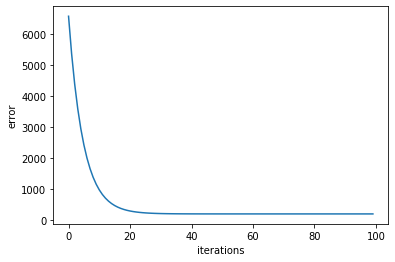

In [44]:
plt.plot(error_list)
plt.xlabel("iterations")
plt.ylabel("error")

In [61]:
X_train

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

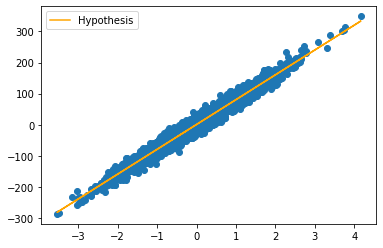

In [73]:
plt.scatter(X_train, y_train)
plt.plot(X_train,hypothesis(X_train, opt_theta), color='orange', label="Hypothesis")
plt.legend()
plt.show()

# Test Data

In [76]:
X_test  = pd.read_csv("./Test Cases/Linear_X_Test.csv").values

In [77]:
# mu and sig are same from training data
X_test  = (X_test - mu ) / sig

In [79]:
y_pred = hypothesis(X_test, opt_theta)

In [82]:
df = pd.DataFrame(data=y_pred, columns=['y'])

In [84]:
df.to_csv("y_pred.csv", index=False)

# Evalution

In [90]:
y_train.mean()

0.683868968015588

### R2 Score

In [94]:
y_pred_on_train = hypothesis(X_train, opt_theta)

In [99]:
def r2_score(Y, Y_):
    """
    calculate r2 score on y_hat and Y
    """
    num = np.sum((Y - Y_)**2)
    denom = np.sum( (Y - Y.mean() )**2 )
    
    score = 1 - (num/denom)
    
    return score

In [96]:
r2_score(y_train, y_pred_on_train)

0.9709612226971643

## SKLEARN - Linear Regression

In [101]:
# import 
from sklearn.linear_model import LinearRegression


# object
model = LinearRegression()

In [102]:
# training - > fit

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
model.predict([[4.5]])

array([[360.25968521]])

In [108]:
y_pred = model.predict(X_test)

In [109]:
model.score(X_train, y_train)

0.9709612233822353

In [110]:
model.intercept_

array([0.68386897])

In [111]:
model.coef_

array([[79.90573694]])

In [112]:
opt_theta

array([ 0.6838508 , 79.90361453])